<a href="https://colab.research.google.com/github/francomanca93/fundamentos-algebra-lineal/blob/operaciones-matriciales/3_Operaciones_con_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones con matrices

## Producto interno entre una matriz y un vector

[Producto escalar](https://es.wikipedia.org/wiki/Producto_escalar)

**Producto interno**, tambien conocido como **producto escalar, producto interior o producto punto**, es una operación algebraica que toma dos secuencias de números de igual longitud (usualmente en la forma de vectores) y retorna un único número. 

In [11]:
import numpy as np

In [12]:
escalar = 5.679
vector = np.array([2, 3])
matriz = np. array([[1, 2], [3, 4], [5, 6]])

In [13]:
A = matriz * vector
B = matriz.dot(vector)

In [14]:
print('Producto elemento a elemento: \n', A)

Producto elemento a elemento: 
 [[ 2  6]
 [ 6 12]
 [10 18]]


Lo que se esta haciendo en este caso es broadcasting. 

In [15]:
print('Producto escalar: \n', B)

Producto escalar: 
 [ 8 18 28]


Se utiliza la función **.dot()** y lo que está pasando en lo siguiente: 

![producto escalar](https://i.imgur.com/cAVzYpx.png)

## Producto interno entre dos matrices

In [16]:
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B = np.array([[2,3],[5,7],[11,13]])

In [17]:
print('Dimension de A: ', A.shape)
print('Dimension de B: ', B.shape)

Dimension de A:  (4, 3)
Dimension de B:  (3, 2)


In [18]:
C = A.dot(B)

Se puede realizar la operación **A . B** ya que:
* Dimension de A:  (4, **3**)
* Dimension de B:  (**3**, 2)

Los valores en negrita son de la misma dimensión. 



In [19]:
print(C)

[[ 45  56]
 [ 99 125]
 [153 194]
 [207 263]]


In [20]:
D = B.dot(A)

ValueError: ignored

No se puede realizar la operación **B . ** ya que:
* Dimension de B:  (3, **2**)
* Dimension de A:  (**4**, 3)

Los valores en negrita son de diferentes dimensión y eso es lo que nos marca el error **ValueError** 

## Propiedades de las matrices

In [36]:
A = np.array([[2,3],[5,7],[11,13]])
B = np.array([[1,3],[2,1]])
C = np.array([[3,1],[4,2]])

Propiedades del producto escalar, [imagen de wikipedia](https://es.wikipedia.org/wiki/Producto_escalar#Propiedades_del_producto_escalar)

![Propiedades](https://i.imgur.com/VFIVjjn.png)

### Asociativa

In [22]:
ABC = A.dot(B.dot(C))
print(ABC)

[[ 60  26]
 [145  63]
 [295 129]]


In [23]:
AB_C = A.dot(B).dot(C)
print(AB_C)

[[ 60  26]
 [145  63]
 [295 129]]


In [24]:
ABC == AB_C

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

### Distribución


In [25]:
D = A.dot(B+C)
E = (A.dot(B) + (A.dot(C)))
print('D: \n', D)
print('E: \n', E)

D: 
 [[ 26  17]
 [ 62  41]
 [122  83]]
E: 
 [[ 26  17]
 [ 62  41]
 [122  83]]


In [26]:
print(D==E)

[[ True  True]
 [ True  True]
 [ True  True]]


### Conmutativa

In [27]:
F = B.dot(C)
G = C.dot(B)
print('F: \n', F)
print('G: \n', G)

F: 
 [[15  7]
 [10  4]]
G: 
 [[ 5 10]
 [ 8 14]]


In [28]:
print(F==G)

[[False False]
 [False False]]


Con esto se concluye que la **propiedad conmutativa** entre matrices no se cumple. Pero si se cumple en un vector. Como se ve en el siguiente ejercicio.

In [29]:
v1 = np.array([[2],[7]])
v2 = np.array([[3],[5]])

Debemos transponer para hacer comprobar la propiedad conmutativa con vectores, ya que las dimesiones deben ser iguales.

In [30]:
v1_tv2 = v1.T.dot(v2)
v2_tv1 = v2.T.dot(v1)


In [31]:
print(v1_tv2)

[[41]]


In [32]:
print(v2_tv1)

[[41]]


## Transposición de un producto de matrices 

Propiedad: (A.dot(B)).T == B.T.dot(A.T)


![alt text](https://i.imgur.com/2cDVJas.png)

In [33]:
A = np.array([[2,3],[5,7],[11,13]])
B = np.array([[1,3],[2,1]])
print('A: \n', A)
print('B: \n', B)

A: 
 [[ 2  3]
 [ 5  7]
 [11 13]]
B: 
 [[1 3]
 [2 1]]


In [34]:
AB_t = A.dot(B).T
B_tA_t = B.T.dot(A.T)
print('AB_t: \n', AB_t)
print('B_tA_t: \n', B_tA_t)

AB_t: 
 [[ 8 19 37]
 [ 9 22 46]]
B_tA_t: 
 [[ 8 19 37]
 [ 9 22 46]]


In [35]:
print(AB_t == B_tA_t)

[[ True  True  True]
 [ True  True  True]]


## Cómo comprobar la solución de un sistema de ecuaciones lineal

En matemáticas y álgebra lineal, un [sistema de ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales), también conocido como **sistema lineal de ecuaciones** o simplemente **sistema lineal**, es un conjunto de ecuaciones lineales (es decir, un sistema de ecuaciones en donde cada ecuación es de primer grado), donde el objetivo es encontrar los valores desconocidos. En el caso de abajo de las variables x1, x2 y x3 que satisfacen las tres ecuaciones. 

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4ffd42e5a3d831221aec68a5611a7baed0c24587)

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [40]:
x = np.arange(-5, 5)

In [42]:
y_1 = 3*x + 5
y_2 = 2*x + 3

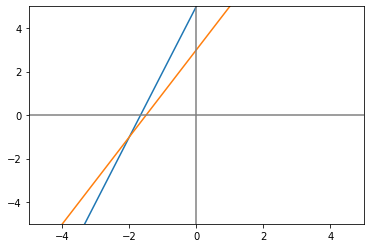

In [43]:
plt.figure()

plt.plot(x, y_1)
plt.plot(x, y_2)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

Forma matricial de nuestras ecuaciones graficadas

In [44]:
A = np.array([[-3, 1],
              [-2, 1]])
print(A)

[[-3  1]
 [-2  1]]


In [45]:
b = np.array([[5], [3]])
print(b)

[[5]
 [3]]


In [47]:
# Proponemos una solución, observada en el gráfico.
sol_1 = np.array([-2, -1])
print(sol_1)

[-2 -1]


In [49]:
# Hacemos el producto punto de A con la solución propuesta
print(A.dot(sol_1))

[5 3]
